In [81]:
import pandas as pd
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.patches as mpatches
import numpy as np
import ipywidgets as widgets
import re
import ast
from scipy.stats import gaussian_kde

In [2]:
df = pd.read_csv('Repo_Messages_Huge_Set.csv')

In [3]:
print(df.shape)
print('Size of dataframe: {} Bytes'.format(int(df.memory_usage(index=True, deep=True).sum())))
print(df.head())

(4125158, 4)
Size of dataframe: 3221134332 Bytes
                                             message  \
0  Merge pull request #26 from plumgrid/fawadk-de...   
1  Merge pull request #48 from plumgrid/qasims-de...   
2  Update README.md\n\nAdding quick start instruc...   
3        Changed grid size for landscape orientation   
4                     Added Polish translation files   

                                              author  \
0  {'name': 'Fawad Khaliq', 'email': '4856592176e...   
1  {'name': 'Fawad Khaliq', 'email': '4856592176e...   
2  {'name': 'Muhammad Sagheer', 'email': '6e79461...   
3  {'name': 'Elman', 'email': '59c728d38dfde4d631...   
4  {'name': 'Elman', 'email': '59c728d38dfde4d631...   

                         repo  \
0  plumgrid/libnetwork-plugin   
1  plumgrid/libnetwork-plugin   
2  plumgrid/libnetwork-plugin   
3   elman22/pocket-amc-reader   
4   elman22/pocket-amc-reader   

                                            language  
0  [{'name': 'Go', 'byt

In [54]:
repoIndecies = {}
totalMessages = []
formatMessages = []
biggestLanguages = []
authors = []
    
messages = 0
repos = 0
for index, row in df.iterrows():
    messages += 1
    if not row['repo'] in repoIndecies:
        repoIndecies[row['repo']] = repos
        totalMessages.append(0)
        formatMessages.append(0)

        biggestLanguages.append('')
        maxBytes = 0
        for language in ast.literal_eval(row['language']):
            if language['bytes'] > maxBytes:
                maxBytes = language['bytes']
                biggestLanguages[repos] = language['name']

        authors.append({})
        repos += 1

    repoIndex = repoIndecies[row['repo']]
    totalMessages[repoIndex] += 1
    if type(row['message']) != float and re.search('[a-zA-Z0-9]+([(].*[)]){0,1}!{0,1}:[ ]*.*$', row['message']):
        formatMessages[repoIndex] += 1
    
    author = ast.literal_eval(row['author'])
    if not author['name'] in authors[repoIndex]:
        authors[repoIndex][author['name']] = 0
    authors[repoIndex][author['name']] += 1 #messages per author

messageRatios = []
authorCounts = []
for i in range(repos):
    messageRatios.append(formatMessages[i]/totalMessages[i])
    authorCounts.append(len(authors[i]))

In [78]:
#1807
#del messageRatios[1807]
#del totalMessages[1807]
del authorCounts[1807]

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Y scale:', max=1.0, step=0.…

interactive(children=(Dropdown(description='Y axis:', layout=Layout(width='30%'), options=('Total Messages', '…

<function __main__.f(mode)>

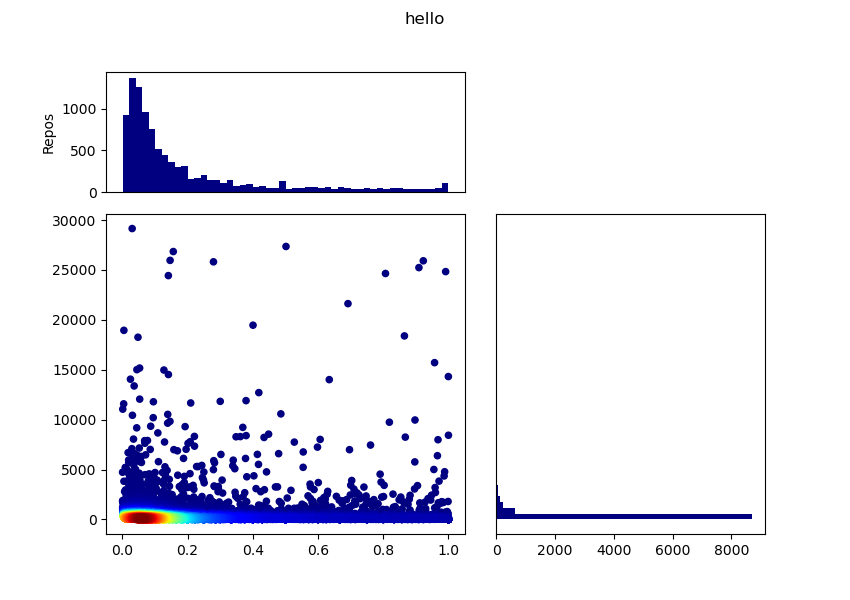

In [132]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8.5, 6), gridspec_kw={'width_ratios': [4, 3],
                                                                                 'height_ratios': [1.5,4],
                                                                                 'wspace': 0.1,
                                                                                 'hspace': 0.1})

ax2.axis('off')
ax1.set_xticks([])
ax4.set_yticks([])

yaxis = totalMessages
xy = np.vstack([messageRatios, yaxis])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = np.array(messageRatios)[idx], np.array(yaxis)[idx], z[idx]

ax3.scatter(x, y, c=z, s=20, cmap=colormaps['jet'], label='Repositories')

ylim = ax3.get_ylim()
yScale = 1.0

ax3.set(ylabel='Total Messages', xlabel='Format Adherence')

ax1.hist(messageRatios, 50, color='navy')
ax1.set(ylabel='Repos')

ax4.hist(totalMessages, 50, orientation='horizontal', color='navy')
ax4.set(xlabel='Repos')

fig.suptitle('hello')
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.toolbar_visible = False
fig.canvas.resizable = False

def Under(item):
    return item <= ylim[1] * yScale 
def f2(scale):
    yScale = scale
    ax3.set_ylim([ylim[0] * yScale, ylim[1] * yScale])

    ax4.clear()
    ax4.hist(list(filter(Under, yaxis)), 50, orientation='horizontal', color='navy')
    #ax4.set_ylim([ylim[0] * yScale, ylim[1] * yScale])
    ax4.set_yticks([])

scaleSlider = widgets.FloatSlider( value=1.0,
                                    min=0,
                                    max=1.0,
                                    step=0.01,
                                    description='Y scale:',
                                    disabled=False,
                                    continuous_update=False,
                                    orientation='horizontal',
                                    readout=True,
                                    readout_format='.2f')
widgets.interact(f2, scale=scaleSlider)

def f(mode):
    if mode == 'Total Messages':
        yaxis = totalMessages
    elif mode == 'Contributors':
        yaxis = authorCounts

    xy = np.vstack([messageRatios, yaxis])
    z = gaussian_kde(xy)(xy)

    idx = z.argsort()
    x, y, z = np.array(messageRatios)[idx], np.array(yaxis)[idx], z[idx]
    ax3.clear()
    ax3.scatter(x, y, c=z, s=20, cmap=colormaps['jet'], label='Repositories')

    ylim = ax3.get_ylim
    yScale = 1.0

    ax4.clear()
    ax4.hist(yaxis, 50, orientation='horizontal', color='navy')
    ax4.set_yticks([])
    

widgets.interact(f, mode=widgets.Dropdown( options=['Total Messages', 'Contributors', 'Biggest Language'],
                                                value='Total Messages',
                                                description='Y axis:',
                                                style={'description_width': 'initial'},
                                                layout=widgets.Layout(width='30%') ))